<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0(02_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 셀1- 한글 폰트 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

In [ ]:
# 셀2-런타임 다시시작
import os
os.kill(os.getpid(), 9)



In [ ]:
# 셀3-폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


#1.이진 분류

#사이킷런에 포함된 데이터셋 활용(와인 데이터)
https://scikit-learn.org/stable/datasets/index.html#wine-recognition-dataset



In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#셀5=-데이터 로드
import numpy as np
import pandas as pd
from sklearn import datasets
#
from sklearn import model_selection
from sklearn import metrics

dataset = datasets.load_wine()


In [ ]:
# 데이터의 기본정보 출력

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.shape

(178, 14)

In [ ]:
#데이터 결측치 확인
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
#데이터스케일링
# 표준 스케일러(평균 0, 분산 1)
from sklearn.preprocessing import StandardScaler # 정규화

scaler = StandardScaler()
# 설명변수 및 목표변수 분리
x = df[df.columns.difference(['target'])]
y = df['target']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

In [ ]:
# 학습, 테스트 데이터셋 7:3 비율로 분리
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.3, random_state = 123)

In [ ]:

log_reg=LogisticRegression(solver='lbfgs')

my_model=log_reg.fit(x_scaled,y)
my_model.fit(x_scaled, y)
w=my_model.coef_
b=my_model.intercept_
print(w)
print(b)

[[-0.84478439  0.81013479  0.47221242  0.17160966  0.64787507  0.13090887
   0.04952905  0.20382073 -0.19982499  0.72595069  0.13833868  1.07895949
   0.2137248 ]
 [ 0.58357323 -1.01032338 -0.848074   -1.04127077  0.35399157  0.6825216
  -0.09770602 -0.44045953  0.21278279  0.05287635  0.26336105 -1.14079293
   0.02752798]
 [ 0.26121116  0.20018858  0.37586158  0.86966111 -1.00186664 -0.81343047
   0.04817698  0.2366388  -0.0129578  -0.77882704 -0.40169973  0.06183345
  -0.24125278]]
[ 0.41229358  0.70481641 -1.11711   ]


In [ ]:
y_predict = my_model.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict)
print(score) #1.0

1.0


In [ ]:
y_predict = my_model.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print(score) #1.0

1.0


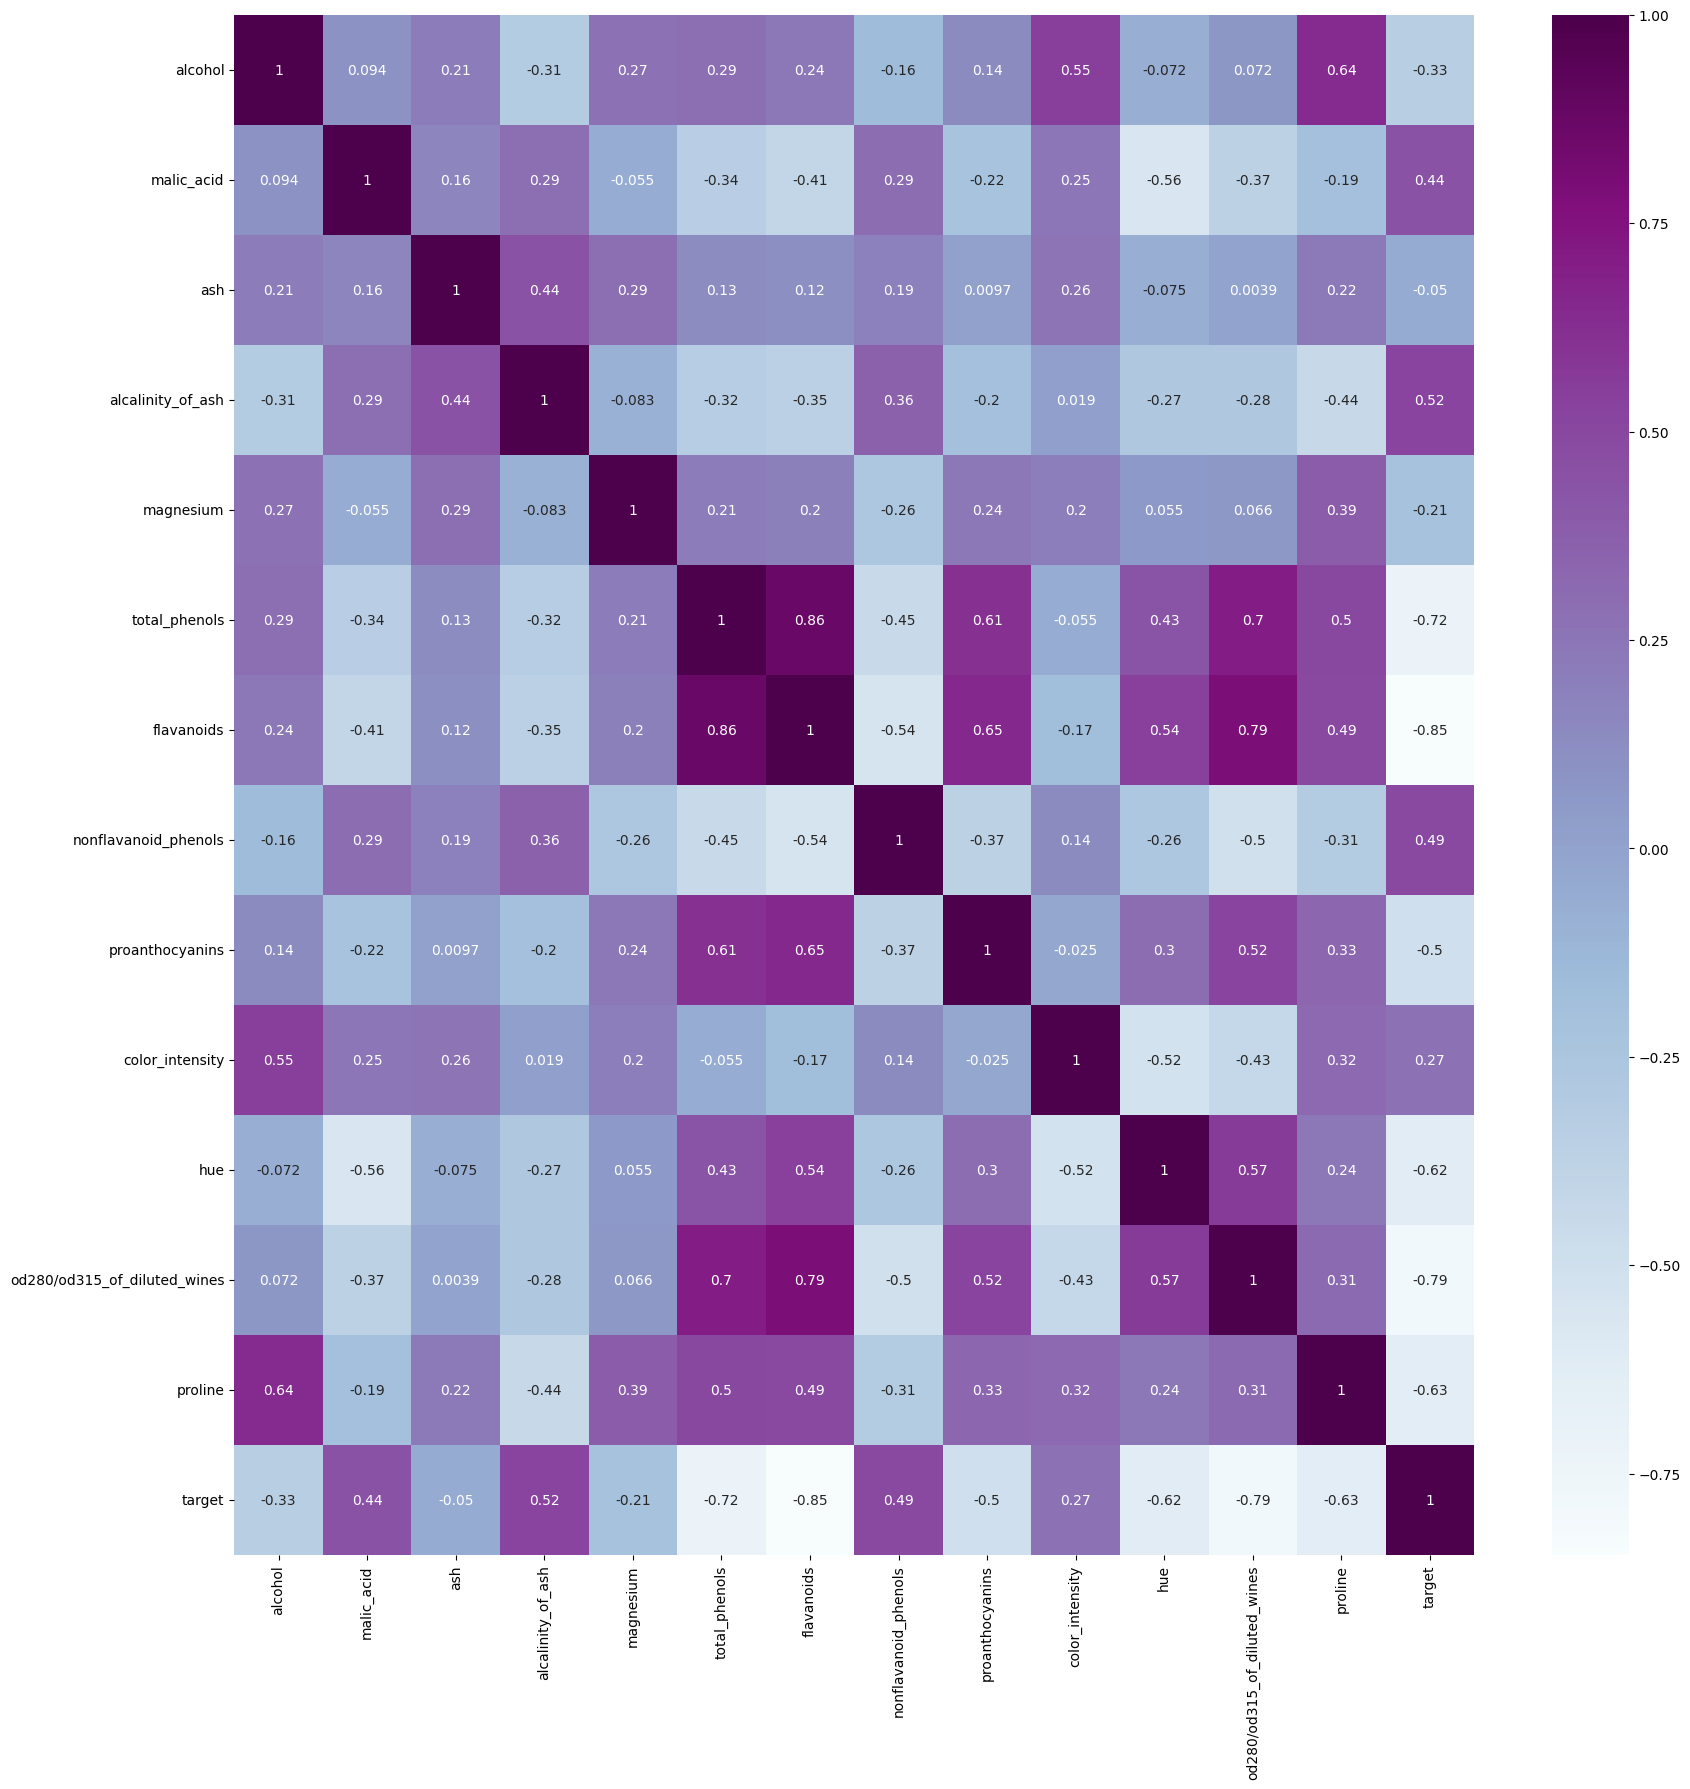

In [ ]:
# Correlation between different variables.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() ,cmap='BuPu', annot=True);

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# x_data = dataset.data
x=df['alcalinity_of_ash']
y = dataset.target
print(x.shape)
print(y.shape)

(178,)
(178,)


In [ ]:
x

0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: alcalinity_of_ash, Length: 178, dtype: float64

In [ ]:
x=x.reshape(-1,1)
# my_model = LogisticRegression(penalty='l2', C=1.0, max_iter=100, tol=0.0001)
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs')

my_model=log_reg.fit(x,y)
my_model.fit(x, y)
w=my_model.coef_
b=my_model.intercept_
print(w)
print(b)




AttributeError: ignored

In [ ]:
# 로지스틱 회귀 모델
def H(x):
  return 1/(1+np.exp(-(x*w+b)))

# 훈련데이터(x) 에 대한 모델의 예측
# y_pred = np.where(H(x) > 0.5 , 1,0)  # 0.5보다 크면 1 아니면 0

Hx = H(x)

ValueError: ignored

In [ ]:
y_predict = my_model.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict)
print(score) #1.0

In [ ]:
y_predict = my_model.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print(score) #1.0

0.9491525423728814


In [ ]:
import matplotlib.pyplot as plt               # 데이터 시각화
plt.plot(x_data, y_data, 'bo', label='training data')       # 훈련 데이터셋
plt.plot(x_in, Hx, 'g', label='H(x)')         # H(x)
plt.plot(x_data, y_predict,'rx', label='prediction')  # 회귀모델의 예측
plt.xlabel("exam score"), plt.ylabel("result")
plt.legend(loc='right')
plt.show()

#다중분류

자동차 가격에 영향을 미치는 속성을 다양하게 분석하여 가격을 예측해봄  

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/download?datasetVersionNumber=1


https://www.kaggle.com/code/hasangrkemyaar/car-price-prediction-multiple-linear-reg

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<ipython-input-16-34d760657347>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True);


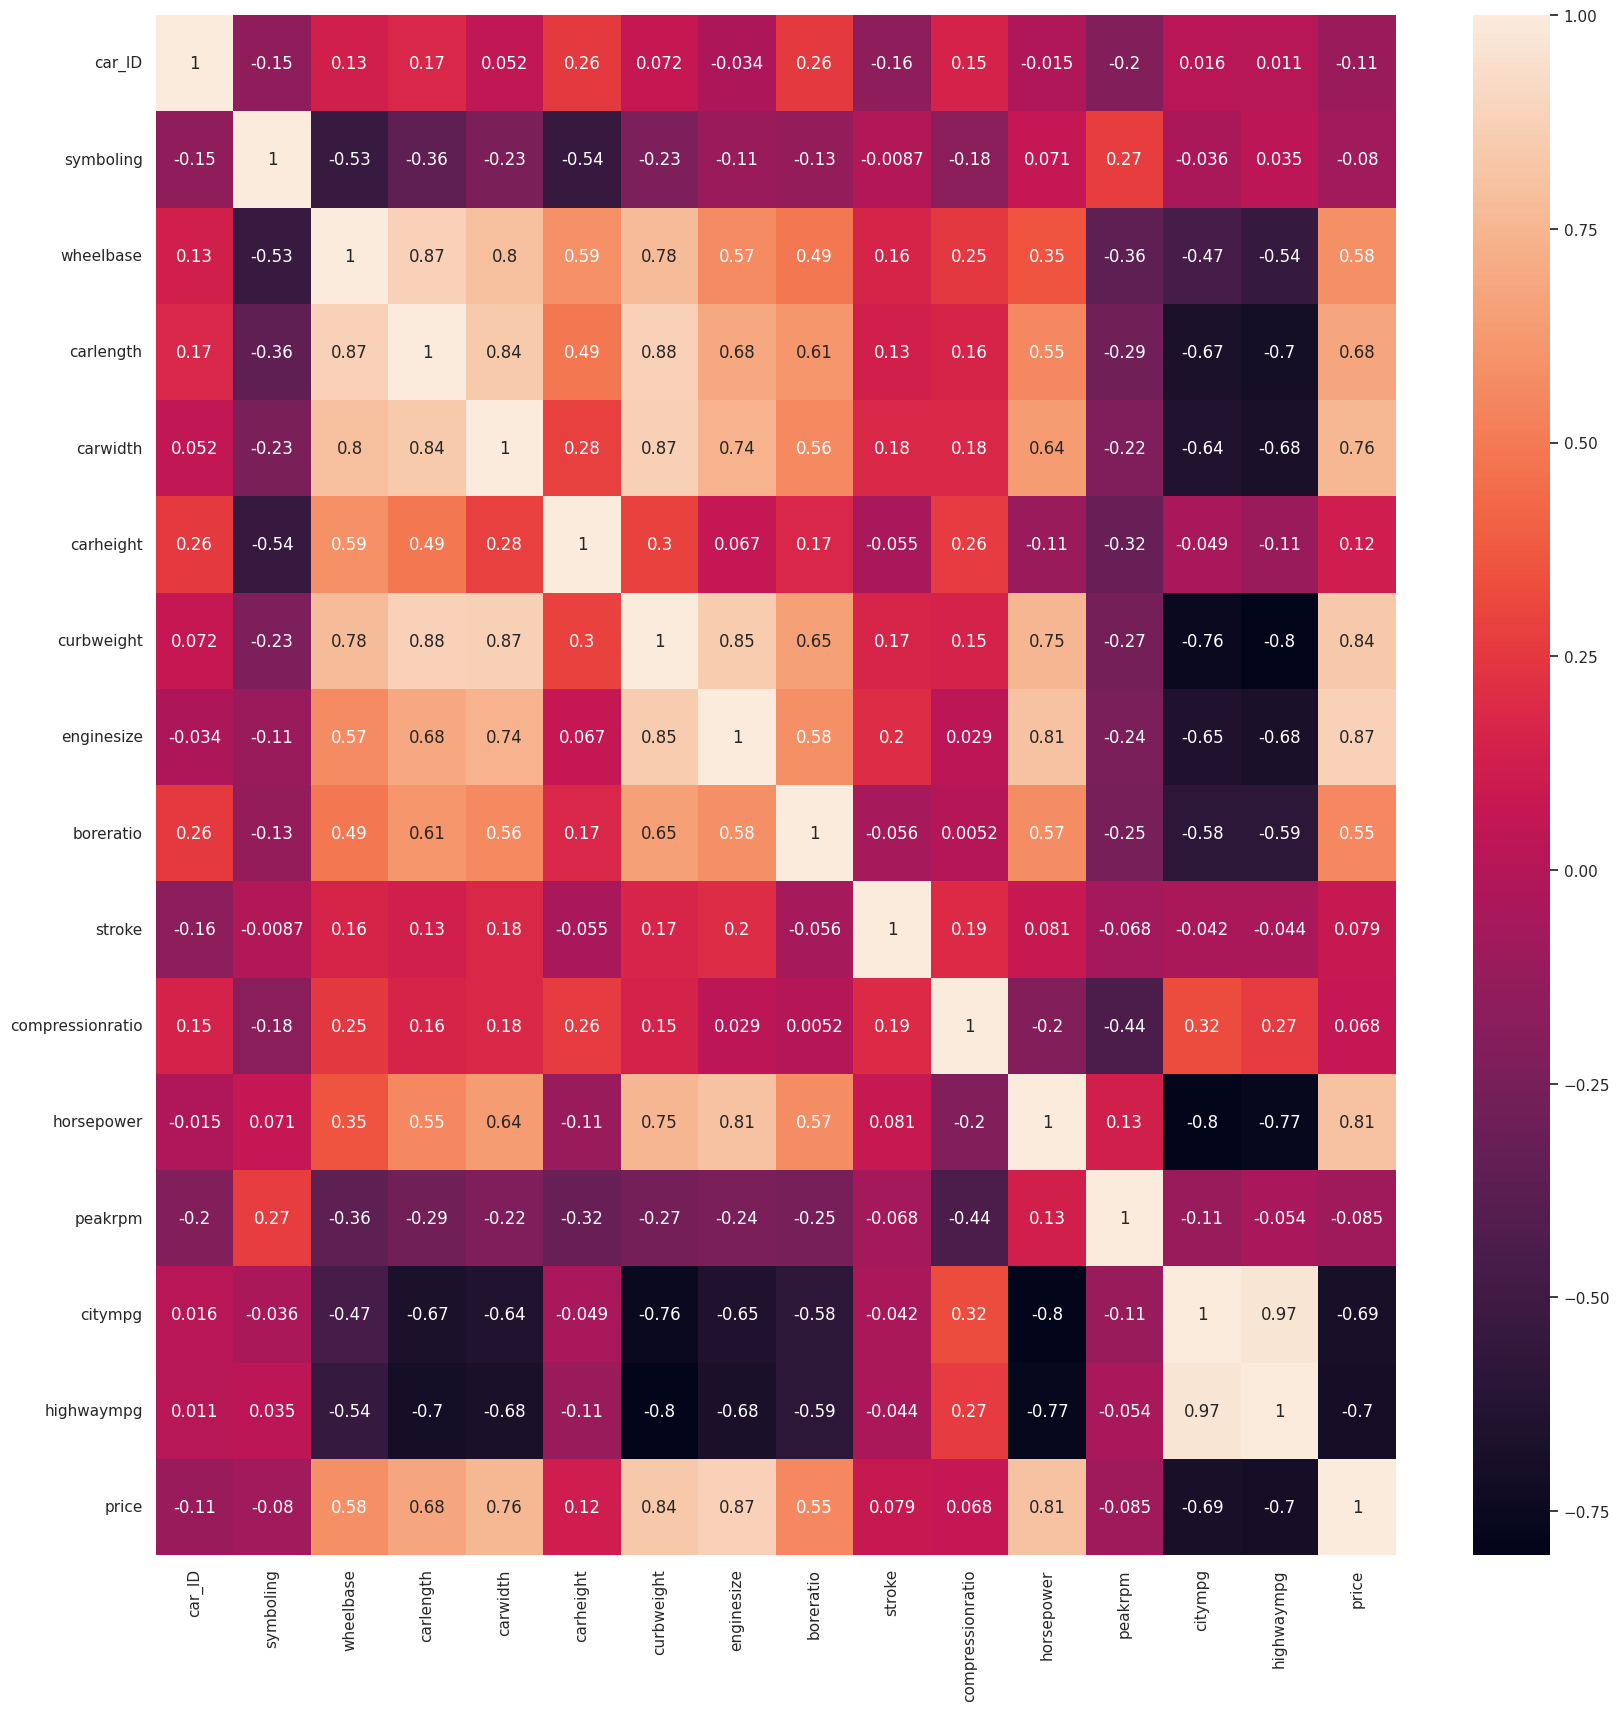

In [ ]:
# Correlation between different variables.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True);

In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함
X = df[['enginesize', 'horsepower']] #속성 2개
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=27)

In [ ]:
#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression

my_lig2=LinearRegression()

#데이터 학습시키기
my_lig2.fit(X_train, y_train)

#학습 결과(추세선) 확인하기
print(my_lig2.coef_)
print(my_lig2.intercept_)

[120.65639168  62.20892616]
-8386.944678074975


In [ ]:
#모델 평가하기
print('이 모델의 정확도는 %.1f %%입니다,'%(my_lig2.score(X_test, y_test)*100))

이 모델의 정확도는 81.4 %입니다,


In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함
X = df[['curbweight','enginesize', 'horsepower']]  #속성3개
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=27)

In [ ]:
#선형회귀 모델 생성
from sklearn.linear_model import LinearRegression

my_lig3=LinearRegression()

#데이터 학습시키기
my_lig3.fit(X_train, y_train)

#학습 결과(추세선) 확인하기
print(my_lig3.coef_)
print(my_lig3.intercept_)

[ 3.92329585 86.67883443 53.72387825]
-13198.535014796918


In [ ]:
#모델 평가하기
print('이 모델의 정확도는 %.1f %%입니다,'%(my_lig3.score(X_test, y_test)*100))

이 모델의 정확도는 85.3 %입니다,
